In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown, os, pandas as pd

share_url = "https://drive.google.com/file/d/1gYdONTw0WnjC7f515bZQ1Yth_5gASvIq/view?usp=sharing"
file_id = "1gYdONTw0WnjC7f515bZQ1Yth_5gASvIq"
out_path = "/content/Telecust1000t.csv"

In [ ]:
gdown.download(id=file_id, output=out_path, quiet=False)

if out_path.lower().endswith(".csv"):
    df = pd.read_csv(out_path, encoding="utf-8-sig")

Downloading...
From: https://drive.google.com/uc?id=1gYdONTw0WnjC7f515bZQ1Yth_5gASvIq
To: /content/Telecust1000t.csv
100%|██████████| 37.0k/37.0k [00:00<00:00, 26.3MB/s]


In [ ]:
import numpy as np

print("Shape (rows, cols):", df.shape)
display(df.head(5))

print("\n=== DataFrame.info() ===")
df.info()


Shape (rows, cols): (1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3



=== DataFrame.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [ ]:
desc = df.describe().T
display(desc)

,count,mean,std,min,25%,50%,75%,max
region,1000.0,2.022,0.816200,1.0,1.0,2.0,3.0,3.0
tenure,1000.0,35.526,21.359812,1.0,17.0,34.0,54.0,72.0
age,1000.0,41.684,12.558816,18.0,32.0,40.0,51.0,77.0
marital,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
address,1000.0,11.551,10.086681,0.0,3.0,9.0,18.0,55.0
income,1000.0,77.535,107.044165,9.0,29.0,47.0,83.0,1668.0
ed,1000.0,2.671,1.222397,1.0,2.0,3.0,4.0,5.0
employ,1000.0,10.987,10.082087,0.0,3.0,8.0,17.0,47.0
retire,1000.0,0.047,0.211745,0.0,0.0,0.0,0.0,1.0
gender,1000.0,0.517,0.499961,0.0,0.0,1.0,1.0,1.0


In [ ]:
df['reside'].value_counts().sort_index()


,count
reside,
1,375
2,272
3,138
4,120
5,60
6,29
7,4
8,2


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

# 1) ستون‌های عددی ورودی (بدون ستون هدف)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "custcat" in num_cols:
    num_cols.remove("custcat")

X = df[num_cols].values
y = df["custcat"].values

# 2) امتیاز ANOVA F برای هر ویژگی نسبت به custcat
F, p = f_classif(X, y)
feat_rank = (pd.DataFrame({"feature": num_cols, "F": F, "p_value": p})
             .sort_values("F", ascending=False)
             .reset_index(drop=True))
display(feat_rank)

# 3) انتخاب 4 ویژگی برتر برای رسم‌های دوبه‌دو/Pairplot
topk = 6
top_features = feat_rank["feature"].head(topk).tolist()
top_features.remove("ed")
print("Top numerical features for plotting:", top_features)

,feature,F,p_value
0,ed,61.454293,1.861950e-36
1,tenure,41.310054,3.655169e-25
2,employ,16.975725,9.288252e-11
3,address,8.432945,1.547485e-05
4,age,7.521435,5.585815e-05
5,income,6.689390,1.798626e-04
6,reside,3.976499,7.861800e-03
7,marital,3.499510,1.511211e-02
8,retire,3.004734,2.958274e-02
9,region,1.094872,3.503157e-01


Top numerical features for plotting: ['tenure', 'employ', 'address', 'age', 'income']


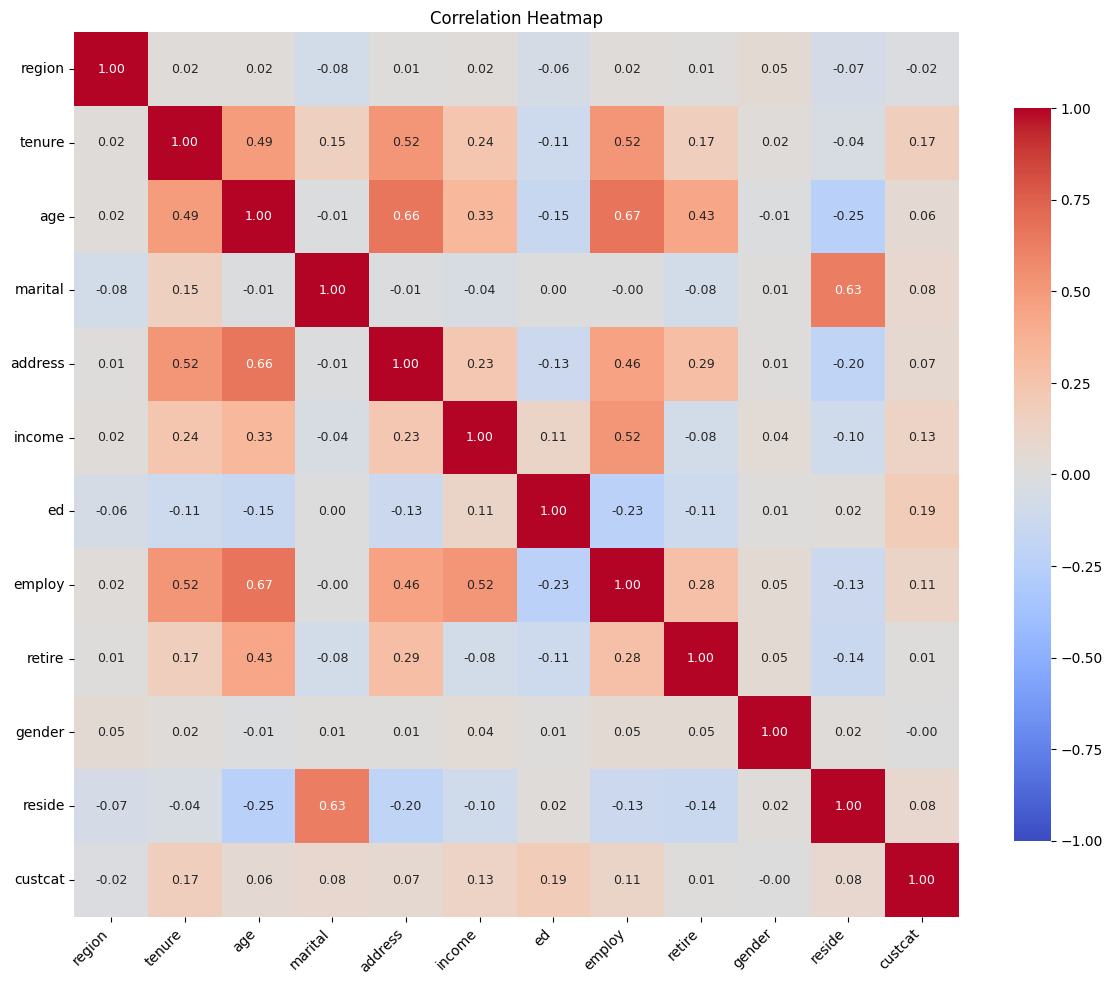

In [ ]:
# همه‌ی ستون‌های عددی شامل custcat
all_num = df.select_dtypes(include=[np.number]).columns.tolist()

# ماتریس همبستگی پیرسون 12×12
corr_all = df[all_num].corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_all.round(2),
    cmap="coolwarm", vmin=-1, vmax=1, center=0,
    annot=True, fmt=".2f", square=True,
    cbar_kws={"shrink": .8}, annot_kws={"size": 9}
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


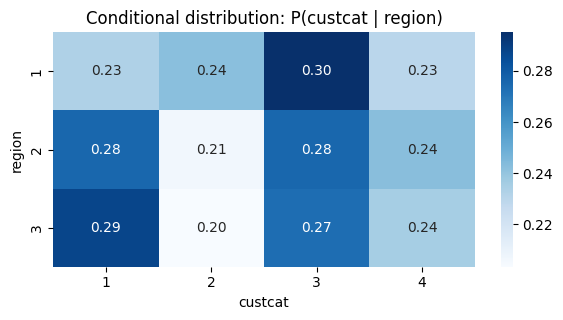

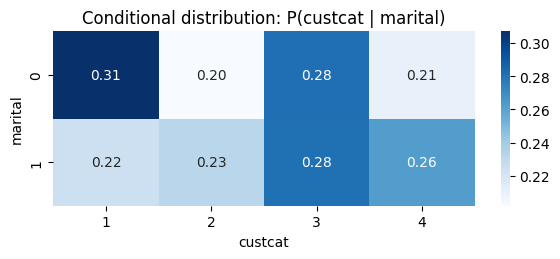

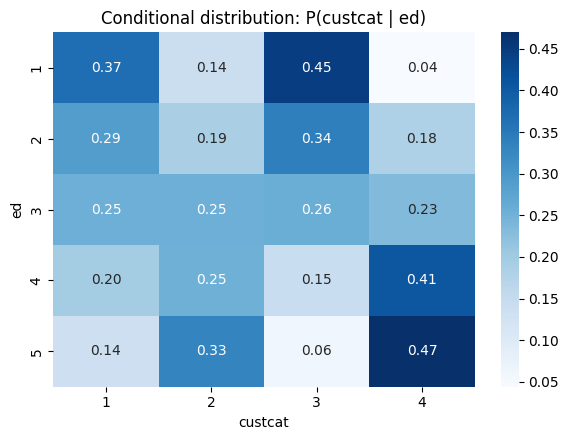

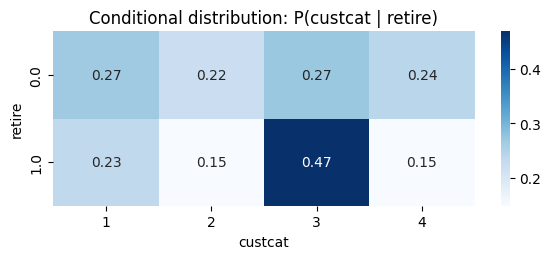

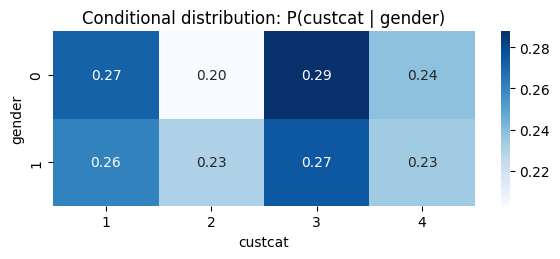

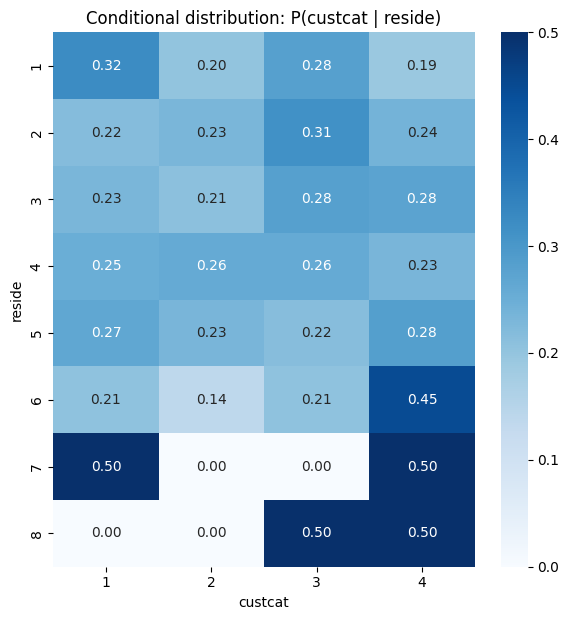

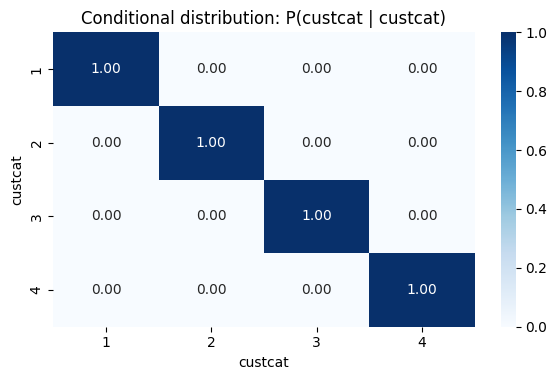

In [ ]:
cat_feats = ["region", "marital", "ed", "retire", "gender", "reside", "custcat"]
target = "custcat"
for col in cat_feats:
    # جدول احتمال شرطی P(custcat | col)
    ct = pd.crosstab(df[col], df[target], normalize="index")  # هر سطر به 1 جمع می‌شود
    plt.figure(figsize=(6, 0.6*ct.shape[0] + 1.5))
    sns.heatmap(ct, annot=True, fmt=".2f", cmap="Blues", cbar=True)
    plt.title(f"Conditional distribution: P({target} | {col})")
    plt.ylabel(col); plt.xlabel(target)
    plt.tight_layout(); plt.show()


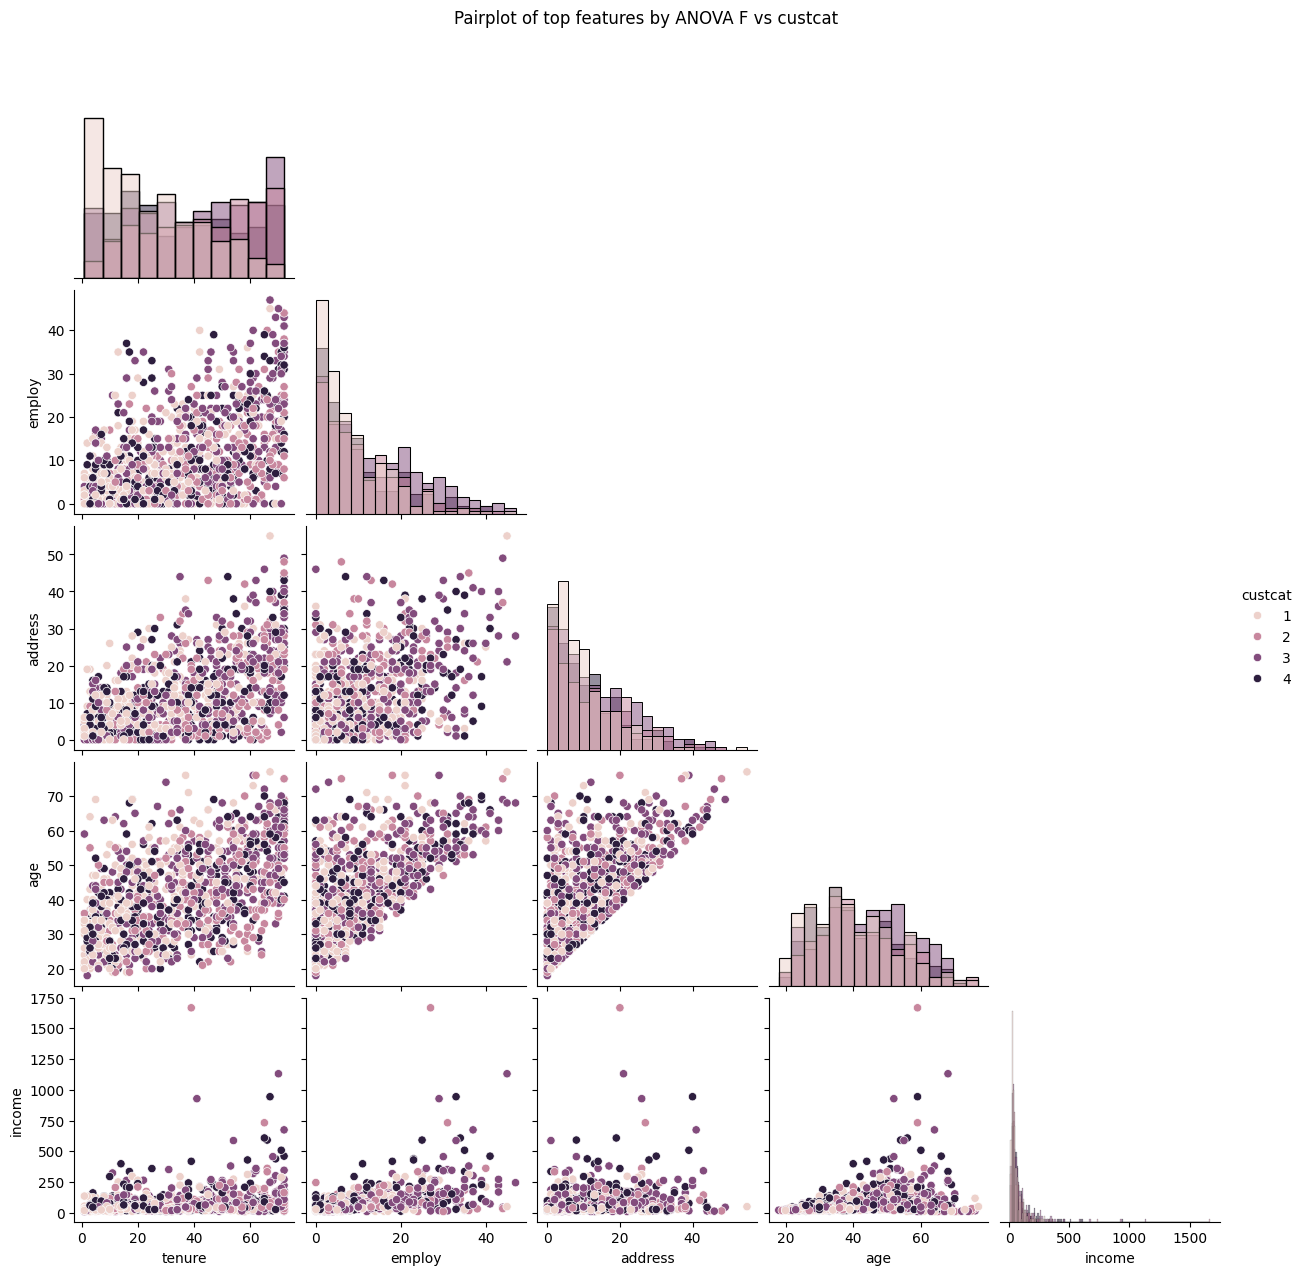

In [ ]:
sns.pairplot(df[top_features + ["custcat"]], hue="custcat", diag_kind="hist", corner=True)
plt.suptitle("Pairplot of top features by ANOVA F vs custcat", y=1.02)
plt.show()


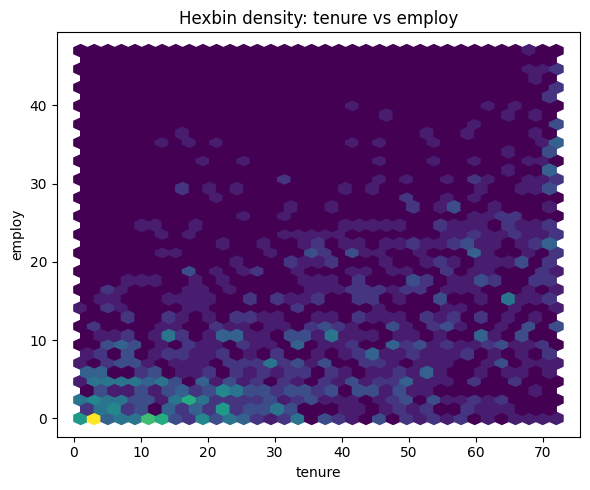

In [ ]:
x1, x2 = top_features[0:2]
plt.figure(figsize=(6,5))
plt.hexbin(df[x1], df[x2], gridsize=35)
plt.xlabel(x1); plt.ylabel(x2)
plt.title(f"Hexbin density: {x1} vs {x2}")
plt.tight_layout()
plt.show()


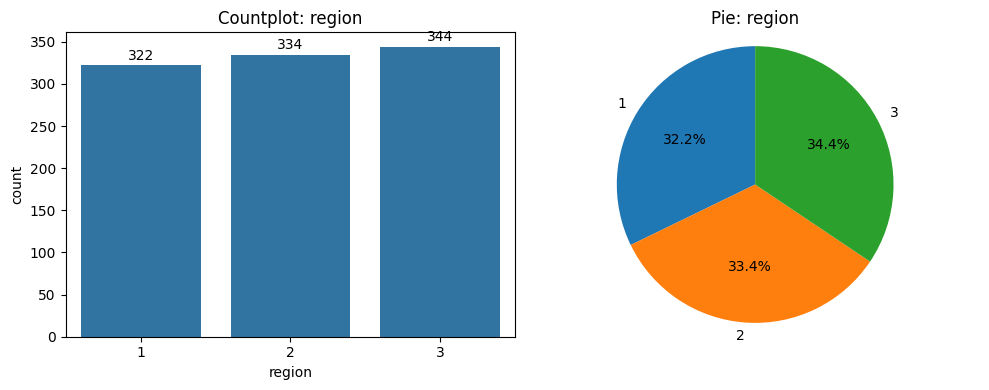

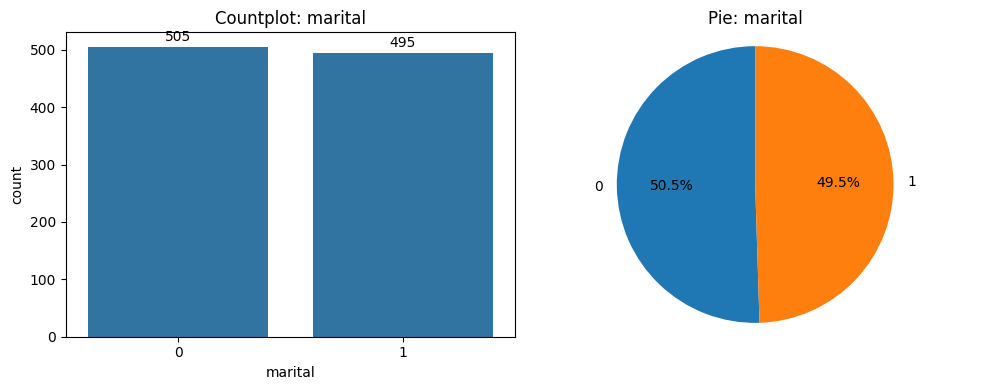

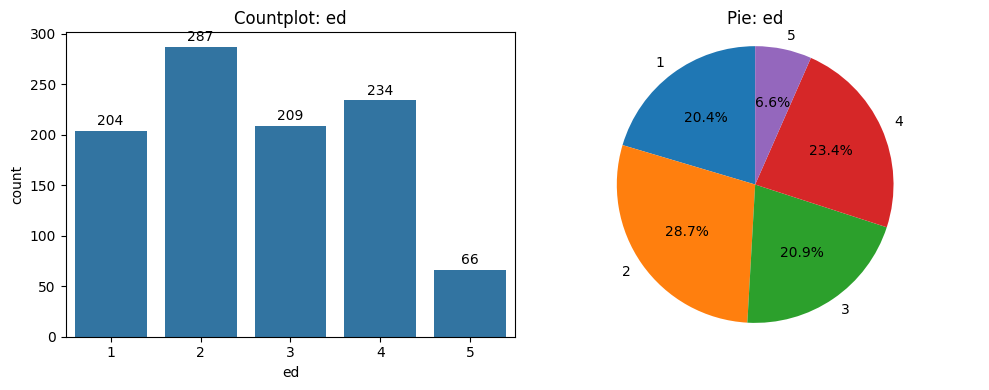

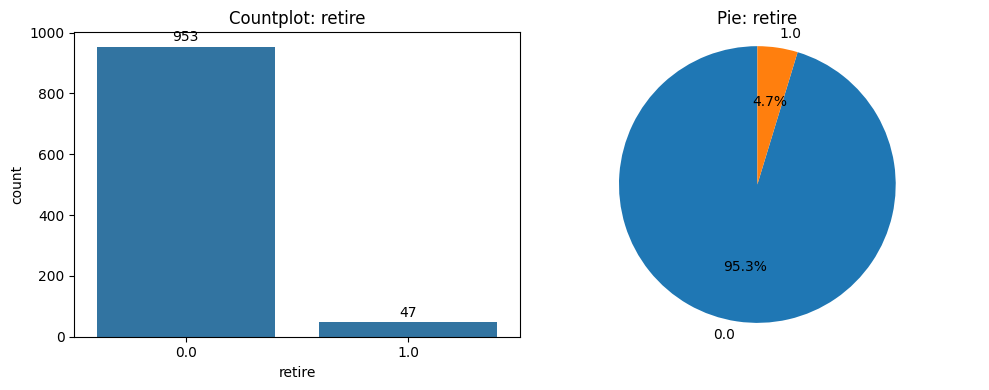

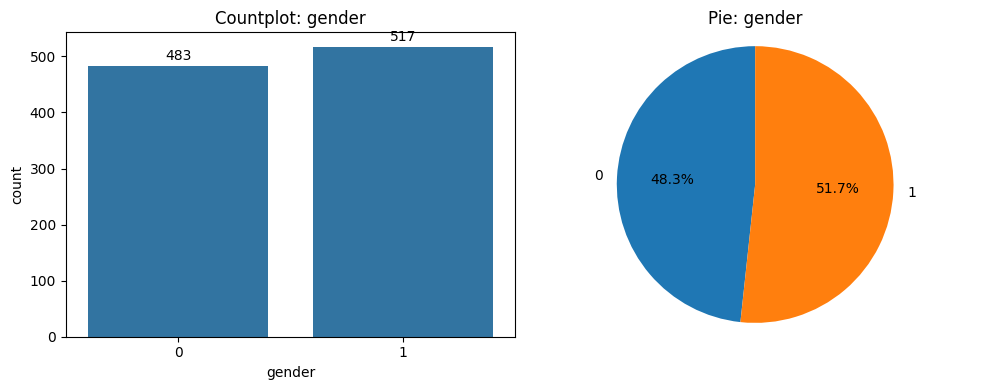

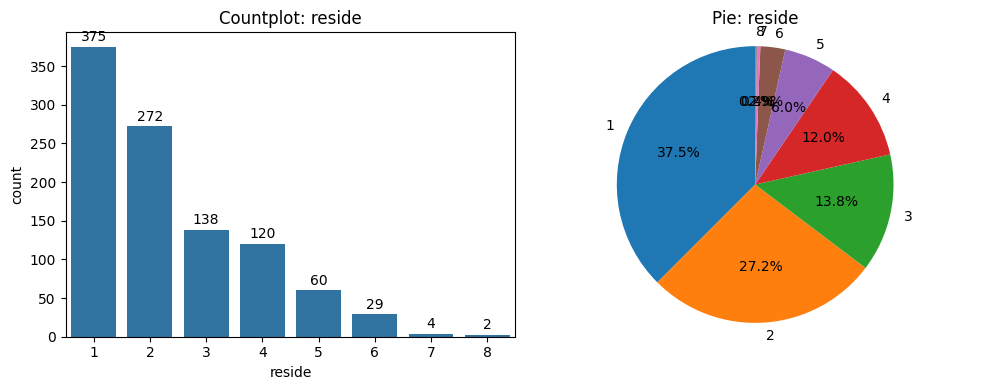

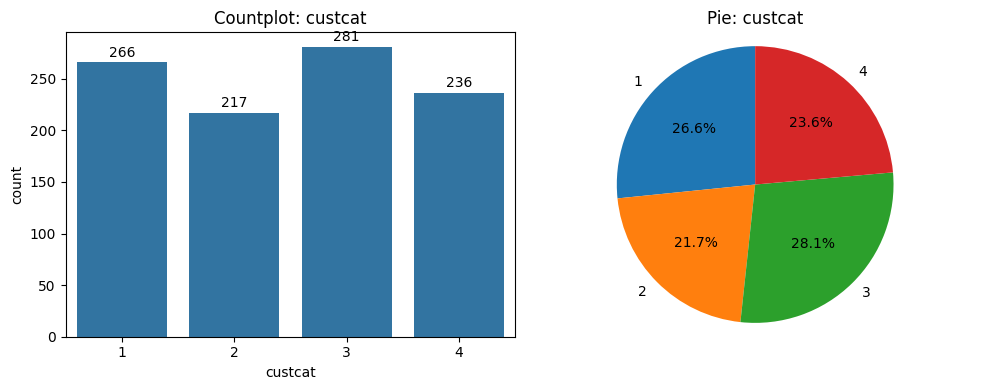

In [ ]:
for col in cat_feats:
    # شمارش منظم‌شده (به ترتیب مقدار)
    counts = df[col].value_counts().sort_index()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # --- Countplot ---
    sns.countplot(data=df, x=col, order=counts.index, ax=axes[0])
    axes[0].set_title(f"Countplot: {col}")
    axes[0].set_xlabel(col); axes[0].set_ylabel("count")
    # برچسب‌گذاری تعداد روی ستون‌ها
    for c in axes[0].containers:
        axes[0].bar_label(c, fmt="%d", padding=2)

    # --- Pie ---
    axes[1].pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)
    axes[1].set_title(f"Pie: {col}")
    axes[1].axis("equal")  # دایره‌ی متقارن

    plt.tight_layout()
    plt.show()


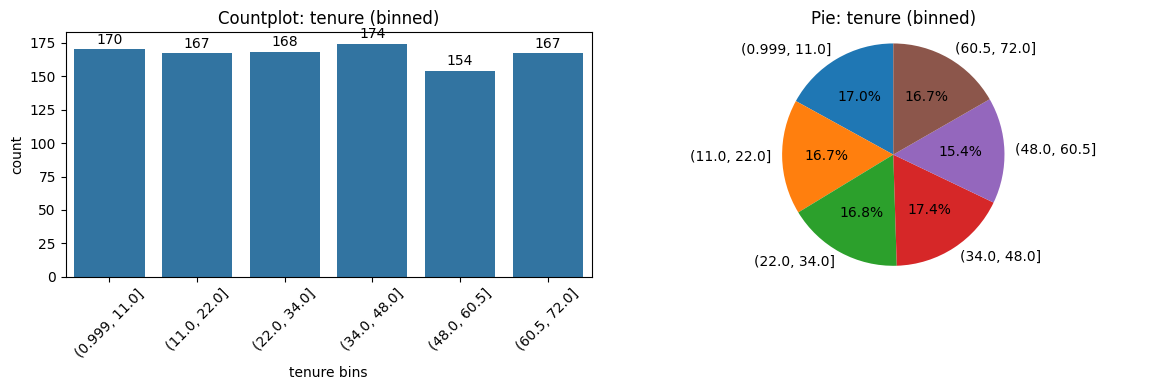

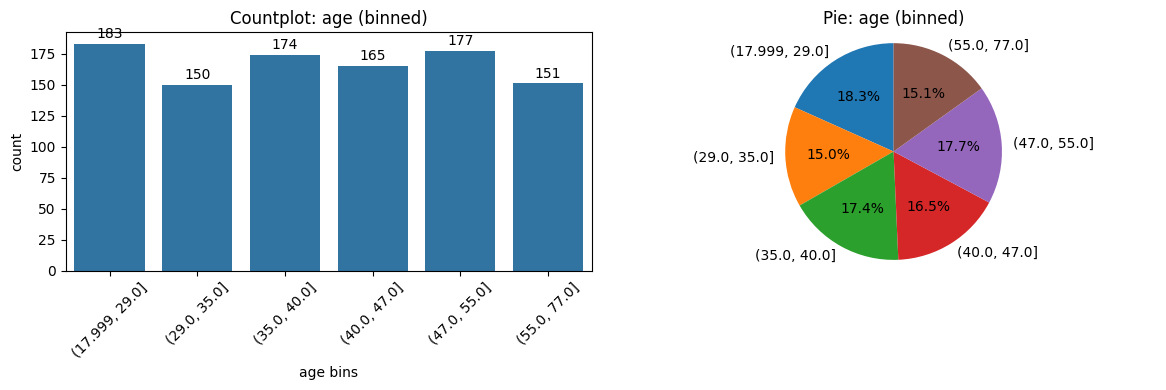

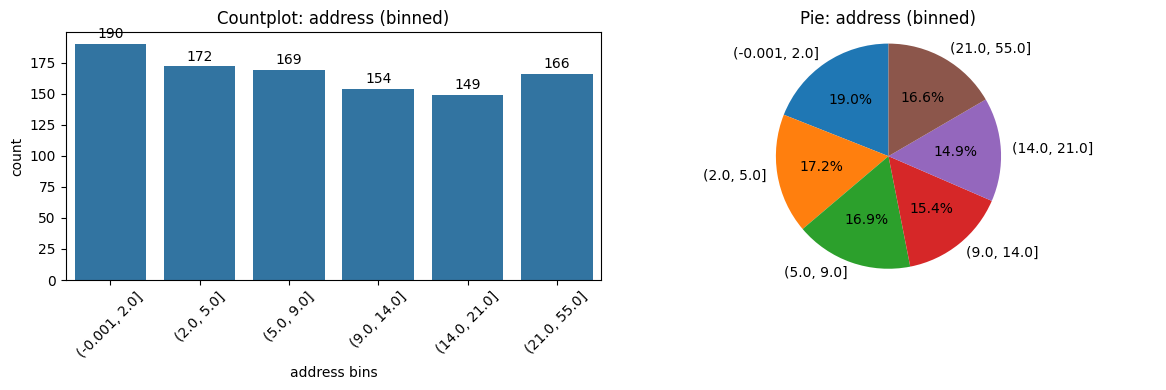

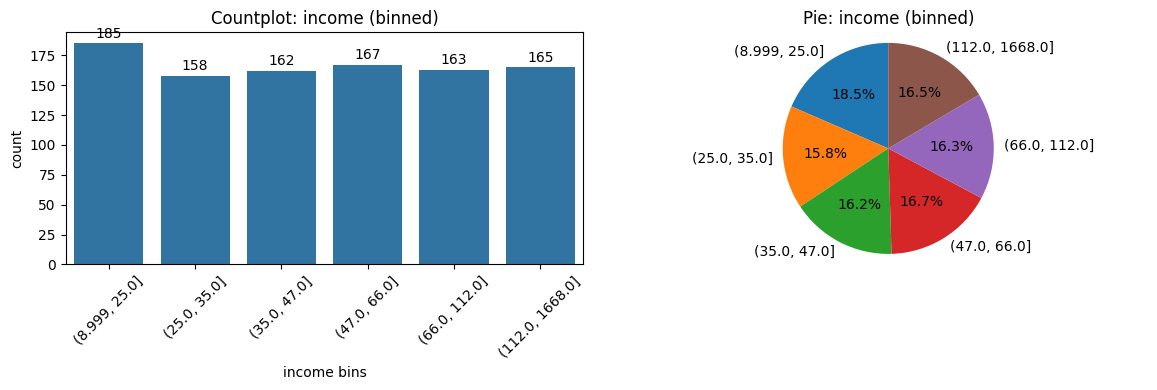

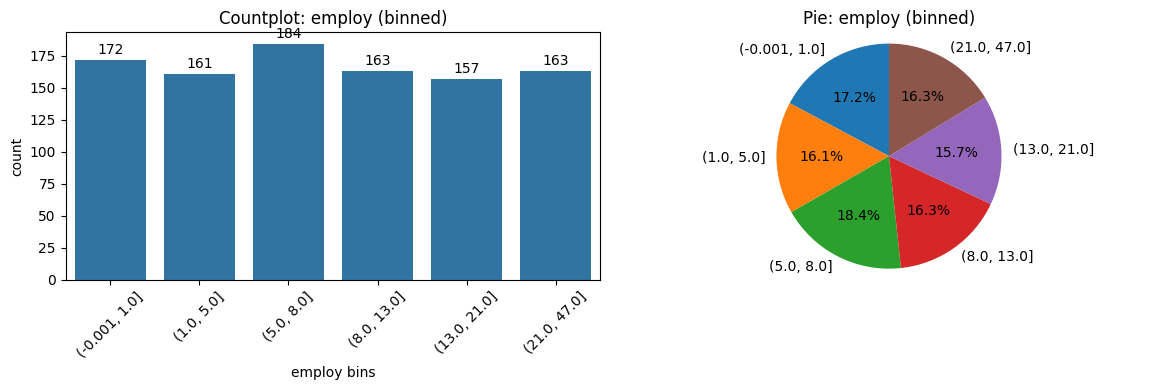

In [ ]:
# ---- تنظیمات کلی ----
# روش بازه‌بندی: "equal_width" یا "quantile"
BIN_METHOD = "quantile"          # ← اگر خواستی مساوی‌عرضه باشد بگذار "equal_width"
N_BINS = 6                       # تعداد بازه‌ها

# ستون‌های عددی (خروجی را حذف می‌کنیم)
num_cols = [c for c in all_num if c not in cat_feats]

def make_bins(s: pd.Series, n_bins=6, method="quantile"):
    s = s.astype(float)
    if method == "quantile":
        # بازه‌بندی بر اساس چارک‌ها (تقریباً جمعیت مساوی در هر سطل)
        # از qcut استفاده می‌کنیم؛ اگر مقدارهای تکراری زیاد باشند، duplicates='drop'
        binned = pd.qcut(s, q=n_bins, duplicates="drop")
    elif method == "equal_width":
        # بازه‌بندی با عرض مساوی
        binned = pd.cut(s, bins=n_bins, include_lowest=True)
    else:
        raise ValueError("BIN_METHOD must be 'quantile' or 'equal_width'")
    return binned

for col in num_cols:
    # 1) بازه‌بندی
    binned = make_bins(df[col], n_bins=N_BINS, method=BIN_METHOD)
    counts = binned.value_counts().sort_index()

    # 2) رسم Countplot و Pie
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Countplot (با ترتیب بازه‌ها)
    sns.countplot(x=binned, order=counts.index, ax=axes[0])
    axes[0].set_title(f"Countplot: {col} (binned)")
    axes[0].set_xlabel(f"{col} bins")
    axes[0].set_ylabel("count")
    axes[0].tick_params(axis='x', rotation=45)
    for c in axes[0].containers:
        axes[0].bar_label(c, fmt="%d", padding=2)

    # Pie
    axes[1].pie(counts.values, labels=[str(i) for i in counts.index],
                autopct="%1.1f%%", startangle=90)
    axes[1].set_title(f"Pie: {col} (binned)")
    axes[1].axis("equal")

    plt.tight_layout()
    plt.show()


In [ ]:
# === 1) تنظیم ستون‌ها و جداسازی X,y  ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

num_to_scale = ["tenure", "employ", "address", "age", "income"]  # فقط این‌ها اسکیل می‌شوند

# X: همه‌ی ویژگی‌ها به جز خروجی و retire
X = df.drop(columns=["custcat", "retire"]).copy()
y = df["custcat"].copy()

# === 2) split (اول تقسیم، بعد اسکیل روی train برای جلوگیری از نشت اطلاعات) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3) اسکیل فقط پنج ویژگی عددی انتخاب‌شده ===
scaler = StandardScaler()
X_train.loc[:, num_to_scale] = scaler.fit_transform(X_train[num_to_scale])
X_test.loc[:,  num_to_scale] = scaler.transform(X_test[num_to_scale])

# اگر لازم داری DataFrame نهاییِ train/test را یکجا داشته باشی:
X_train_ready = X_train.copy()  # ویژگی‌های اسکیل‌شده + بقیه ویژگی‌ها (بدون retire)
X_test_ready  = X_test.copy()


/tmp/ipython-input-3619073903.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.44764334 -0.61597978 -0.00627295 -0.19387505 -0.19387505 -0.99118398
  0.32203073  1.26004124 -1.17878608  1.07243914  0.60343389  1.40074282
  1.21314072  1.07243914  1.40074282  1.30694177 -0.99118398 -0.33457662
  0.97863809 -1.31948766 -0.42837767  0.79103599 -0.42837767 -0.100074
 -0.52217873  0.18132916 -1.17878608  1.02553861  0.27513021  0.46273231
 -1.31948766  1.11933967  0.97863809  1.7290465  -0.89738293 -1.13188556
  0.97863809  1.7290465  -0.80358188  0.83793651 -1.13188556 -0.61597978
 -0.00627295  1.07243914  1.49454387 -1.60089081  0.55653336 -1.22568661
 -0.94428345 -1.60089081  0.08752811 -1.60089081  1.7290465  -0.14697452
 -1.27258713 -1.13188556  0.88483704 -1.46018923 -0.24077557 -0.6628803
 -1.36638818 -1.0380845  -0.4752782  -1.0380845   0.27513021  0.46273231
 -1.46018923  0.18132916 -0.75668135 -1.17878

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFECV

# نام ویژگی‌ها
feat_names = X_train.columns.tolist()

# ---------- روش 1: لاسو (Logistic L1 + CV) ----------
# شبکه‌ای از C ها (هرچه بزرگ‌تر -> جریمه کمتر)
Cs_grid = np.logspace(-2, 3, 12)

lasso_cv = LogisticRegressionCV(
    Cs=Cs_grid,
    penalty="l1",
    solver="saga",
    multi_class="multinomial",
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    max_iter=1000,
    refit=True,
    random_state=42
)
lasso_cv.fit(X_train, y_train)

coef_mat = lasso_cv.coef_                # شکل: (n_classes, n_features)
keep_mask_lasso = np.any(np.abs(coef_mat) > 1e-6, axis=0)  # هرجا حداقل در یک کلاس غیرصفر بود
selected_lasso = [f for f, k in zip(feat_names, keep_mask_lasso) if k]

print("=== LASSO (L1) selected features ===")
print(f"Count: {len(selected_lasso)} / {len(feat_names)}")
print(selected_lasso)
print("\nBest C per class (multinomial):", lasso_cv.C_)  # اطلاع جانبی

# ---------- روش 2: RFECV (حذف بازگشتی با CV) ----------
base_est = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    multi_class="multinomial",
    max_iter=1000,
    random_state=42
)

rfecv = RFECV(
    estimator=base_est,
    step=1,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
rfecv.fit(X_train, y_train)

keep_mask_rfe = rfecv.support_
selected_rfe = [f for f, k in zip(feat_names, keep_mask_rfe) if k]

print("\n=== RFECV selected features ===")
print(f"Optimal n_features_: {rfecv.n_features_} / {len(feat_names)}")
print(selected_rfe)

# ---------- خلاصهٔ مقایسه ----------
print("\n=== Summary ===")
print("Intersection (both methods):", sorted(set(selected_lasso) & set(selected_rfe)))
print("Only LASSO:", sorted(set(selected_lasso) - set(selected_rfe)))
print("Only RFECV:", sorted(set(selected_rfe) - set(selected_lasso)))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== LASSO (L1) selected features ===
Count: 7 / 10
['region', 'tenure', 'age', 'income', 'ed', 'employ', 'reside']

Best C per class (multinomial): [0.08111308 0.08111308 0.08111308 0.08111308]

=== RFECV selected features ===
Optimal n_features_: 6 / 10
['region', 'tenure', 'age', 'income', 'ed', 'gender']

=== Summary ===
Intersection (both methods): ['age', 'ed', 'income', 'region', 'tenure']
Only LASSO: ['employ', 'reside']
Only RFECV: ['gender']


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



== LogReg (INTERSECTION) — MAIN ==
Best: {'C': 0.3, 'class_weight': 'balanced', 'l1_ratio': 0.8, 'penalty': 'elasticnet'} | CV bal-acc: 0.412
Test Acc: 0.385 | Bal-Acc: 0.3825 | Macro AUC: 0.6889
              precision    recall  f1-score   support

           1      0.357     0.377     0.367        53
           2      0.395     0.341     0.366        44
           3      0.421     0.429     0.425        56
           4      0.367     0.383     0.375        47

    accuracy                          0.385       200
   macro avg      0.385     0.382     0.383       200
weighted avg      0.386     0.385     0.385       200



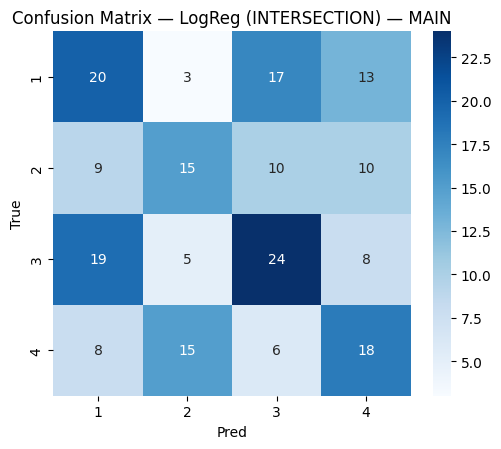

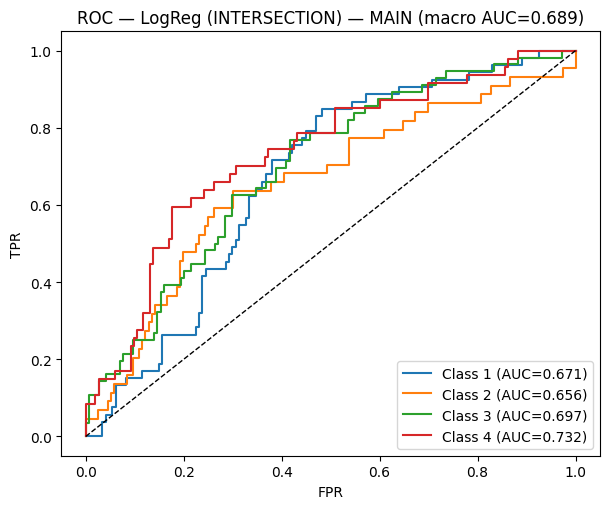

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



== LogReg (LASSO-selected) ==
Best: {'C': 0.05, 'class_weight': 'balanced', 'l1_ratio': 0.5, 'penalty': 'elasticnet'} | CV bal-acc: 0.4086
Test Acc: 0.39 | Bal-Acc: 0.3877 | Macro AUC: 0.6947
              precision    recall  f1-score   support

           1      0.371     0.434     0.400        53
           2      0.366     0.341     0.353        44
           3      0.440     0.393     0.415        56
           4      0.383     0.383     0.383        47

    accuracy                          0.390       200
   macro avg      0.390     0.388     0.388       200
weighted avg      0.392     0.390     0.390       200



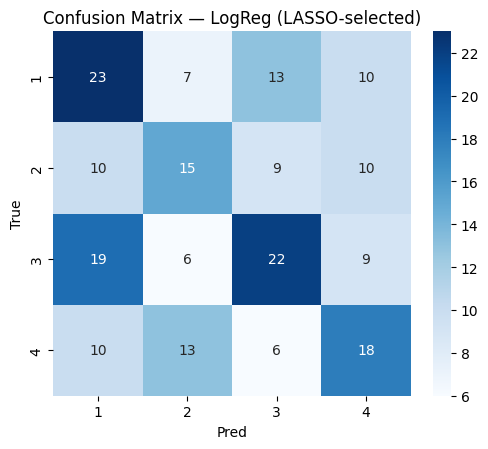

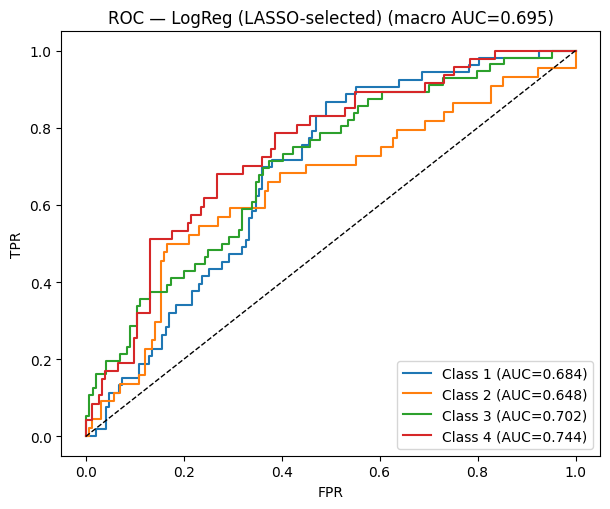

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



== LogReg (RFECV-selected) ==
Best: {'C': 0.3, 'class_weight': 'balanced', 'l1_ratio': 0.5, 'penalty': 'elasticnet'} | CV bal-acc: 0.4067
Test Acc: 0.39 | Bal-Acc: 0.3866 | Macro AUC: 0.6833
              precision    recall  f1-score   support

           1      0.351     0.377     0.364        53
           2      0.378     0.318     0.346        44
           3      0.424     0.446     0.435        56
           4      0.404     0.404     0.404        47

    accuracy                          0.390       200
   macro avg      0.389     0.387     0.387       200
weighted avg      0.390     0.390     0.389       200



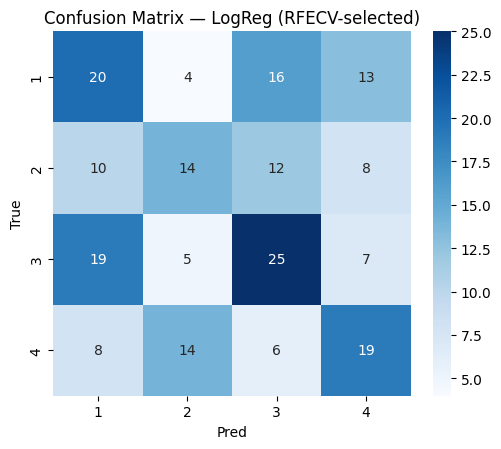

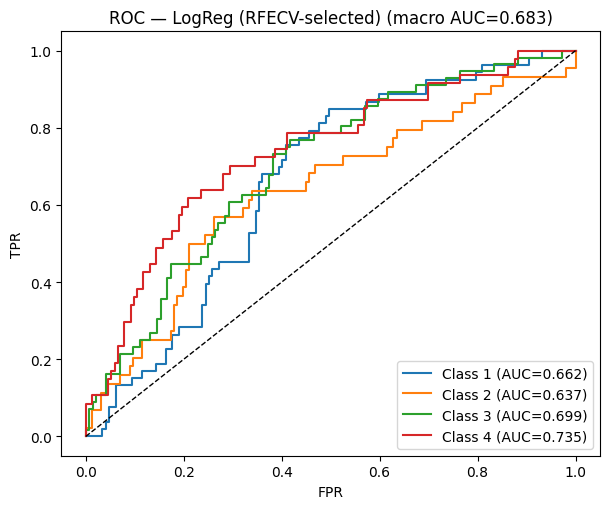

In [ ]:
# === Minimal multi-class Logistic + ROC/AUC (fixed) ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

feat_lasso = list(selected_lasso)
feat_rfe   = list(selected_rfe)
feat_inter = sorted(set(feat_lasso) & set(feat_rfe))
models_to_run = [("LogReg (LASSO-selected)", feat_lasso),
                 ("LogReg (RFECV-selected)", feat_rfe)]
if len(feat_inter)>0:
    models_to_run.insert(0, ("LogReg (INTERSECTION) — MAIN", feat_inter))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
base = LogisticRegression(solver="saga", multi_class="multinomial", max_iter=10000, random_state=42)
param_grids = [
    {"penalty":["l2"], "C":[0.05,0.1,0.3,1,3,10], "class_weight":[None,"balanced"]},
    {"penalty":["elasticnet"], "C":[0.05,0.1,0.3,1,3,10], "l1_ratio":[0.2,0.5,0.8], "class_weight":[None,"balanced"]}
]

classes = np.sort(np.unique(y_train))

def run_and_plot(name, feats):
    Xtr, Xte = X_train[feats], X_test[feats]

    gs = GridSearchCV(base, param_grids, scoring="balanced_accuracy", cv=cv, n_jobs=-1, refit=True, verbose=0)
    gs.fit(Xtr, y_train)
    best = gs.best_estimator_

    y_pred  = best.predict(Xte)
    y_score = best.predict_proba(Xte)

    acc  = accuracy_score(y_test, y_pred)
    bacc = balanced_accuracy_score(y_test, y_pred)
    auc_macro = roc_auc_score(y_test, y_score, multi_class="ovr", average="macro")

    print(f"\n== {name} ==")
    print("Best:", gs.best_params_, "| CV bal-acc:", round(gs.best_score_,4))
    print("Test Acc:", round(acc,4), "| Bal-Acc:", round(bacc,4), "| Macro AUC:", round(auc_macro,4))
    print(classification_report(y_test, y_pred, digits=3))

    # Confusion Matrix
    cm = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Pred'])
    plt.figure(figsize=(5.2,4.6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix — {name}")
    plt.tight_layout(); plt.show()

    # ROC (OvR) per class — FIXED
    y_test_bin = label_binarize(y_test, classes=classes)  # shape (n, n_classes)
    plt.figure(figsize=(6.2,5.2))
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        class_auc = auc(fpr, tpr)  # <-- correct usage
        plt.plot(fpr, tpr, label=f"Class {c} (AUC={class_auc:.3f})")
    plt.plot([0,1],[0,1],"k--", lw=1)
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title(f"ROC — {name} (macro AUC={auc_macro:.3f})")
    plt.legend(loc="lower right"); plt.tight_layout(); plt.show()

for name, feats in models_to_run:
    if not feats:
        print(f"\n{name}: no features.");
        continue
    run_and_plot(name, feats)


=== Covariance Matrix (Train) ===
         region  tenure    age  marital  address  income     ed  employ  \
region    0.660   0.031  0.009   -0.032    0.005   0.029 -0.080   0.011   
tenure    0.031   1.001  0.475    0.083    0.520   0.234 -0.129   0.523   
age       0.009   0.475  1.001   -0.000    0.663   0.317 -0.187   0.658   
marital  -0.032   0.083 -0.000    0.250    0.000  -0.019 -0.008   0.005   
address   0.005   0.520  0.663    0.000    1.001   0.225 -0.174   0.477   
income    0.029   0.234  0.317   -0.019    0.225   1.001  0.148   0.513   
ed       -0.080  -0.129 -0.187   -0.008   -0.174   0.148  1.522  -0.261   
employ    0.011   0.523  0.658    0.005    0.477   0.513 -0.261   1.001   
gender    0.030   0.013 -0.018    0.010   -0.010   0.024 -0.009   0.027   
reside   -0.047  -0.040 -0.365    0.432   -0.265  -0.117  0.049  -0.185   

         gender  reside  
region    0.030  -0.047  
tenure    0.013  -0.040  
age      -0.018  -0.365  
marital   0.010   0.432  
address  -

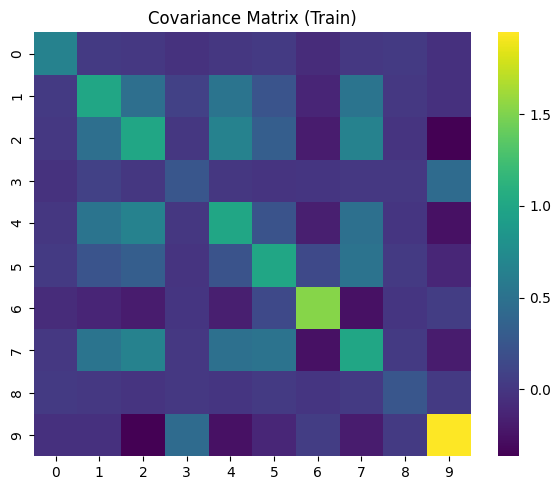

Top-10 eigenvalues: [3.1388 1.9163 1.5431 0.8518 0.659  0.5175 0.3931 0.2568 0.2281 0.1296]
Explained ratio (PC1..PC5): [0.3258 0.1989 0.1602 0.0884 0.0684]
Cumulative ratio (PC1..PC5): [0.3258 0.5247 0.6849 0.7733 0.8417]


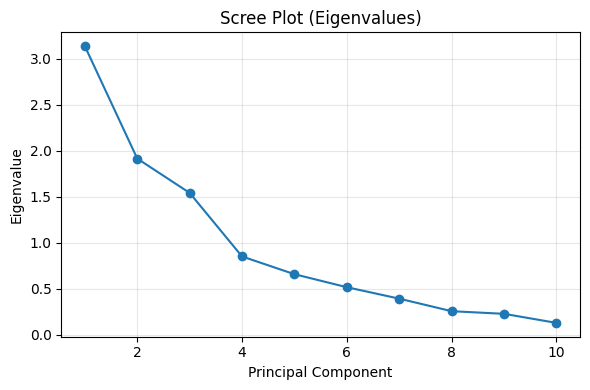

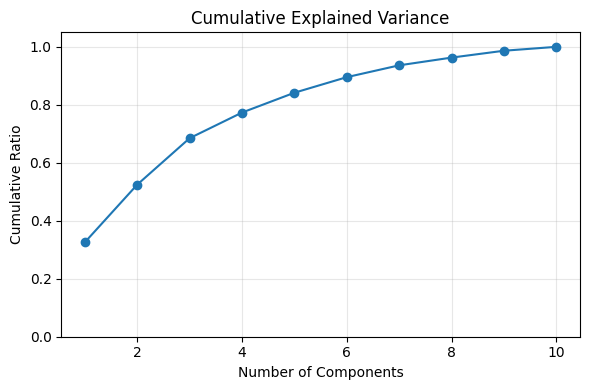


=== Eigenvalues & explained variance (top PCs) ===
      eigenvalue  explained_ratio  cum_ratio
PC1       3.1388           0.3258     0.3258
PC2       1.9163           0.1989     0.5247
PC3       1.5431           0.1602     0.6849
PC4       0.8518           0.0884     0.7733
PC5       0.6590           0.0684     0.8417
PC6       0.5175           0.0537     0.8954
PC7       0.3931           0.0408     0.9362
PC8       0.2568           0.0267     0.9629
PC9       0.2281           0.0237     0.9866
PC10      0.1296           0.0134     1.0000

=== Principal component loadings (PC1, PC2) ===
            PC1     PC2
region  -0.0262  0.0160
tenure  -0.3668 -0.2622
age     -0.4742 -0.0877
marital  0.0463 -0.2414
address -0.4276 -0.1207
income  -0.2723 -0.0964
ed       0.1902  0.1729
employ  -0.4519 -0.2033
gender  -0.0008 -0.0222
reside   0.3747 -0.8772

Top contributors to PC1 (by |loading|):
age       -0.4742
employ    -0.4519
address   -0.4276
reside     0.3747
tenure    -0.3668
income   

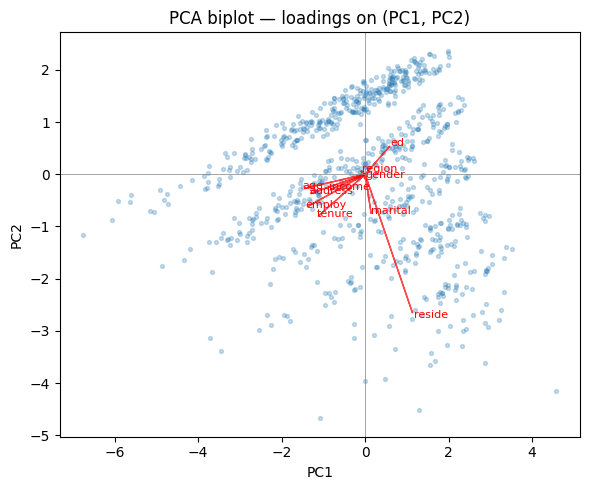


=== Projection matrix W (raw → [PC1, PC2]) ===
              PC1       PC2
region  -0.026192  0.016037
tenure  -0.366754 -0.262203
age     -0.474163 -0.087656
marital  0.046282 -0.241403
address -0.427646 -0.120650
income  -0.272253 -0.096366
ed       0.190192  0.172851
employ  -0.451920 -0.203272
gender  -0.000778 -0.022166
reside   0.374733 -0.877213
Shapes -> Z_tr: (800, 2) Z_te: (200, 2) | any NaN? False False


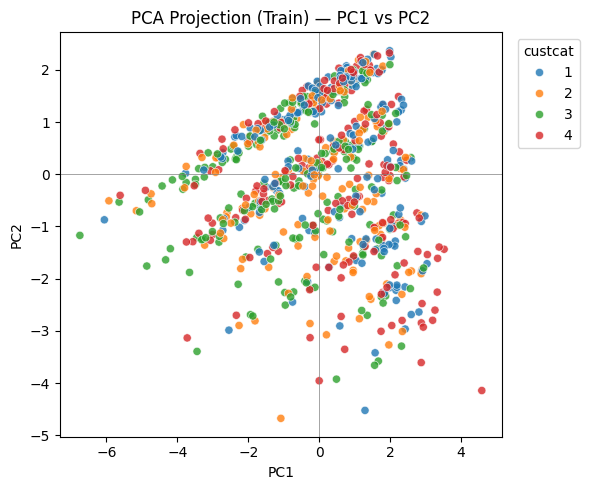

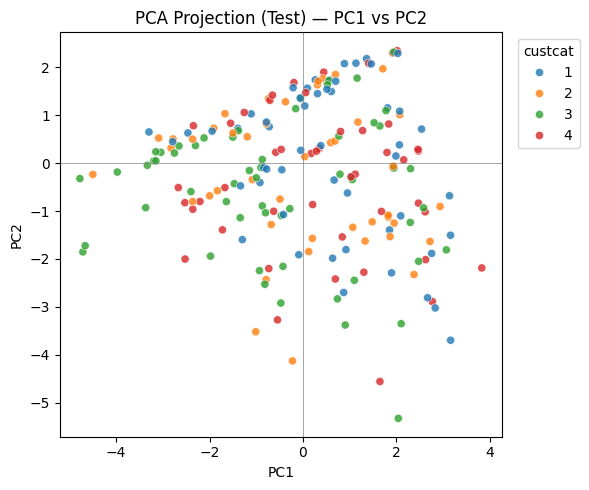

In [ ]:
# ==== PCA manual (robust) via SVD + covariance/eigen display ====
# 0) sanity
assert X_train.shape[1] == X_test.shape[1], "Train/Test feature mismatch!"

# 1) mean-center by TRAIN mean
mu = X_train.mean(axis=0)
Xc_tr = X_train - mu
Xc_te = X_test  - mu

# 2) SVD on centered TRAIN (numerically stable)
# Xc_tr = U S V^T, columns of V are principal directions (eigenvectors of covariance)
U, S, Vt = np.linalg.svd(Xc_tr.values, full_matrices=False)
V = Vt.T                             # (p x p)
eigvals = (S**2) / (len(Xc_tr)-1)    # eigenvalues of covariance
# sort descending just in case
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
V = V[:, idx]

# 3) covariance (from data) and heatmap (optional but requested)
Sigma = np.cov(Xc_tr.values, rowvar=False)

cov_df = pd.DataFrame(Sigma, index=X_train.columns, columns=X_train.columns)
print("=== Covariance Matrix (Train) ===")
print(cov_df.round(3))

plt.figure(figsize=(6,5))
sns.heatmap(Sigma, cmap="viridis")
plt.title("Covariance Matrix (Train)")
plt.tight_layout(); plt.show()

# 4) scree (eigenvalues) + cumulative explained variance
explained_ratio = eigvals / eigvals.sum()
cum_ratio = np.cumsum(explained_ratio)

print("Top-10 eigenvalues:", np.round(eigvals[:10], 4))
print("Explained ratio (PC1..PC5):", np.round(explained_ratio[:5], 4))
print("Cumulative ratio (PC1..PC5):", np.round(cum_ratio[:5], 4))

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(eigvals)+1), eigvals, marker="o")
plt.title("Scree Plot (Eigenvalues)")
plt.xlabel("Principal Component"); plt.ylabel("Eigenvalue")
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(cum_ratio)+1), cum_ratio, marker="o")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components"); plt.ylabel("Cumulative Ratio")
plt.ylim(0, 1.05); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# ==== پس از محاسبه‌ی eigvals و V (ستون‌های V همان PCها) این بخش را اضافه کن ====

# نام مؤلفه‌ها و دیتافریم بارگذاری‌ها (loadings)
pc_names = [f"PC{i+1}" for i in range(V.shape[1])]
loadings_df = pd.DataFrame(V, index=X_train.columns, columns=pc_names)

# 1) جدول جمع‌بندی: مقادیر ویژه + نسبت واریانس برای چند PC اول
k_show = min(10, V.shape[1])
summary_df = pd.DataFrame({
    "eigenvalue": eigvals[:k_show],
    "explained_ratio": explained_ratio[:k_show],
    "cum_ratio": np.cumsum(explained_ratio[:k_show])
}, index=[f"PC{i+1}" for i in range(k_show)])
print("\n=== Eigenvalues & explained variance (top PCs) ===")
print(summary_df.round(4))

# 2) نمایش بردارهای ویژه (loadings) برای PC1 و PC2
print("\n=== Principal component loadings (PC1, PC2) ===")
W2_df = loadings_df.iloc[:, :2].copy()  # ماتریس نگاشت 2بعدی (p x 2)
print(W2_df.round(4))

# 3) ویژگی‌های با بیشترین سهم در هر PC (بر اساس |loading|)
def top_abs_loadings(loadings_series, topn=10):
    return loadings_series.reindex(loadings_series.abs().sort_values(ascending=False).index)[:topn]

print("\nTop contributors to PC1 (by |loading|):")
print(top_abs_loadings(loadings_df["PC1"], topn=10).round(4))

print("\nTop contributors to PC2 (by |loading|):")
print(top_abs_loadings(loadings_df["PC2"], topn=10).round(4))

# 5) project to first two PCs (PC1, PC2)
W2 = V[:, :2]                        # (p x 2)
Z_tr = Xc_tr.values @ W2             # (n_train x 2)
Z_te = Xc_te.values @ W2             # (n_test  x 2)


pc_train = pd.DataFrame(Z_tr, columns=["PC1","PC2"], index=X_train.index)
pc_train["custcat"] = y_train.values

pc_test  = pd.DataFrame(Z_te, columns=["PC1","PC2"], index=X_test.index)
pc_test["custcat"] = y_test.values

# 4) (اختیاری) بای‌پلات سادهٔ بارگذاری‌ها به‌صورت فلش روی فضای PC1-PC2
scale = 3.0  # طول فلش‌ها؛ اگر بزرگ/کوچک بود، تغییر بده
plt.figure(figsize=(6,5))
plt.scatter(pc_train["PC1"], pc_train["PC2"], s=8, alpha=0.25, label="samples")
for feat, (lx, ly) in W2_df.iterrows():
    plt.arrow(0, 0, scale*lx, scale*ly, color="red", alpha=0.7, head_width=0.02)
    plt.text(scale*lx*1.05, scale*ly*1.05, feat, fontsize=8, color="red")
plt.axhline(0, color="gray", lw=0.5); plt.axvline(0, color="gray", lw=0.5)
plt.title("PCA biplot — loadings on (PC1, PC2)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()

# 5) یادآوری نگاشت: Z = (X - mu) @ W2  ← همین W2_df ماتریس نگاشت به 2 بعد است
print("\n=== Projection matrix W (raw → [PC1, PC2]) ===")
print(W2_df.round(6))

print("Shapes -> Z_tr:", Z_tr.shape, "Z_te:", Z_te.shape,
      "| any NaN?", np.isnan(Z_tr).any(), np.isnan(Z_te).any())

# 7) plots
plt.figure(figsize=(6,5))
sns.scatterplot(data=pc_train, x="PC1", y="PC2", hue="custcat",
                palette="tab10", s=35, alpha=0.8)
plt.title("PCA Projection (Train) — PC1 vs PC2")
plt.axhline(0, color="gray", lw=0.5); plt.axvline(0, color="gray", lw=0.5)
plt.legend(title="custcat", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=pc_test, x="PC1", y="PC2", hue="custcat",
                palette="tab10", s=35, alpha=0.8)
plt.title("PCA Projection (Test) — PC1 vs PC2")
plt.axhline(0, color="gray", lw=0.5); plt.axvline(0, color="gray", lw=0.5)
plt.legend(title="custcat", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout(); plt.show()



=== LDA — Eigenvalues (top) ===
[ 0.270559  0.116968  0.019143  0.        0.        0.        0.
  0.       -0.       -0.      ]

=== LDA — Discriminative power ratio (top) ===
[ 0.665302  0.287625  0.047074  0.        0.        0.        0.
  0.       -0.       -0.      ]

=== LDA Projection matrix W (raw → LD1..LDk) ===
              LD1       LD2
region   0.106264 -0.333462
tenure  -0.701655  0.745822
age      0.136410 -0.216645
marital  0.058137  0.125470
address  0.012052  0.052189
income  -0.049327  0.023301
ed      -0.655362 -0.423439
employ   0.050448  0.097501
gender  -0.147835  0.224732
reside  -0.133877 -0.165216


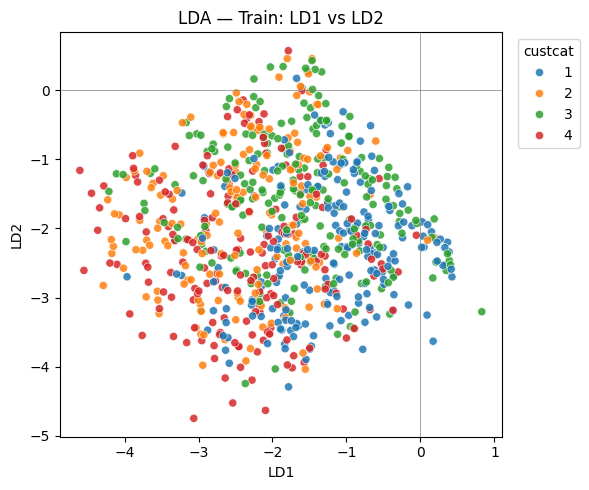

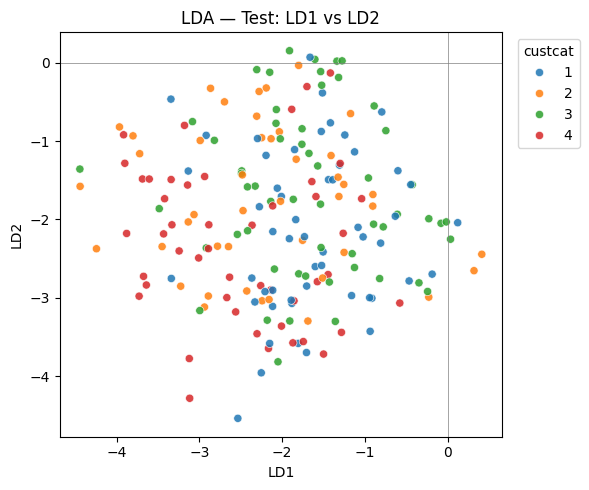

In [ ]:
# ==== LDA (manual): compute SW, SB, generalized eigen, show eigenpairs, map to 2D and plot ====
# ----- inputs: X_train, y_train, X_test, y_test must exist -----
Xtr = X_train.values
Xte = X_test.values
ytr = y_train.values
classes = np.sort(np.unique(ytr))
p = Xtr.shape[1]

# 1) class means and global mean
mu = Xtr.mean(axis=0)  # global mean (1 x p)
class_stats = {}
for c in classes:
    Xc = Xtr[ytr == c]
    class_stats[c] = {
        "n": Xc.shape[0],
        "mu": Xc.mean(axis=0)
    }

# 2) within-class scatter SW and between-class scatter SB
SW = np.zeros((p, p), dtype=float)
SB = np.zeros((p, p), dtype=float)
for c in classes:
    Xc = Xtr[ytr == c]
    muc = class_stats[c]["mu"]
    nc  = class_stats[c]["n"]

    # (Xc - mu_c)^T (Xc - mu_c)
    Xc_centered = Xc - muc
    SW += Xc_centered.T @ Xc_centered

    # n_c (mu_c - mu)(mu_c - mu)^T
    diff = (muc - mu).reshape(-1, 1)
    SB += nc * (diff @ diff.T)

# 3) generalized eigenproblem: SB w = lambda SW w  → eig( pinv(SW) SB )
#    use pseudo-inverse for numerical stability (SW may be singular)
M = np.linalg.pinv(SW) @ SB
eigvals, eigvecs = np.linalg.eig(M)   # eigvecs columns are eigenvectors

# 4) keep real parts (imag parts should be ~0 due to symmetry)
eigvals = np.real(eigvals)
eigvecs = np.real(eigvecs)

# 5) sort eigenpairs descending by eigenvalue
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# 6) normalize eigenvectors (columns) to unit norm for readability
for j in range(eigvecs.shape[1]):
    nj = np.linalg.norm(eigvecs[:, j])
    if nj > 0:
        eigvecs[:, j] /= nj

# 7) report eigenvalues / "discriminative power ratio" and eigenvectors (loadings)
k_show = min(10, len(eigvals))
power_ratio = eigvals / eigvals.sum() if eigvals.sum() > 0 else np.zeros_like(eigvals)

print("\n=== LDA — Eigenvalues (top) ===")
print(np.round(eigvals[:k_show], 6))
print("\n=== LDA — Discriminative power ratio (top) ===")
print(np.round(power_ratio[:k_show], 6))

# loadings dataframe (all LDs)
ld_names = [f"LD{i+1}" for i in range(eigvecs.shape[1])]
loadings_df = pd.DataFrame(eigvecs, index=X_train.columns, columns=ld_names)

# 8) choose top-2 discriminant directions (k = min(C-1, 2))
k = min(len(classes) - 1, 2)
Wk = eigvecs[:, :k]                 # (p x k)
Wk_df = pd.DataFrame(Wk, index=X_train.columns, columns=[f"LD{i+1}" for i in range(k)])

print("\n=== LDA Projection matrix W (raw → LD1..LDk) ===")
print(Wk_df.round(6))

# 9) project train/test
Z_tr_LDA = Xtr @ Wk     # (n_train x k)
Z_te_LDA = Xte @ Wk     # (n_test  x k)

# 10) build DataFrames and plot
cols = [f"LD{i+1}" for i in range(k)]
df_tr_LDA = pd.DataFrame(Z_tr_LDA, columns=cols, index=X_train.index)
df_tr_LDA["custcat"] = y_train.values
df_te_LDA = pd.DataFrame(Z_te_LDA, columns=cols, index=X_test.index)
df_te_LDA["custcat"] = y_test.values
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_tr_LDA, x="LD1", y="LD2", hue="custcat",
                palette="tab10", s=35, alpha=0.85)
plt.title("LDA — Train: LD1 vs LD2")
plt.axhline(0, color="gray", lw=0.5); plt.axvline(0, color="gray", lw=0.5)
plt.legend(title="custcat", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout(); plt.show()
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_te_LDA, x="LD1", y="LD2", hue="custcat",
                palette="tab10", s=35, alpha=0.85)
plt.title("LDA — Test: LD1 vs LD2")
plt.axhline(0, color="gray", lw=0.5); plt.axvline(0, color="gray", lw=0.5)
plt.legend(title="custcat", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout(); plt.show()

Test Accuracy (MLP): 0.3600


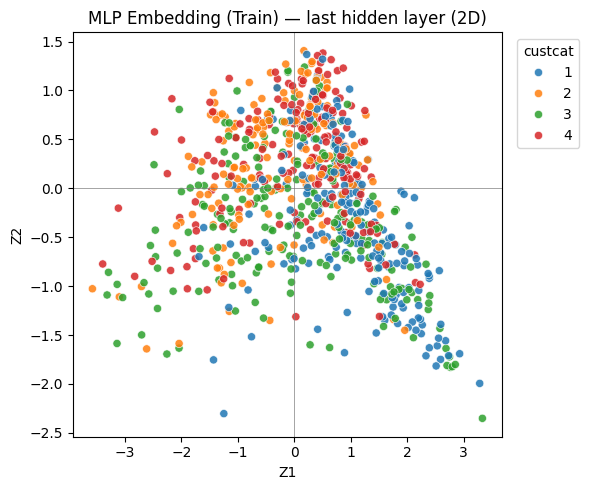

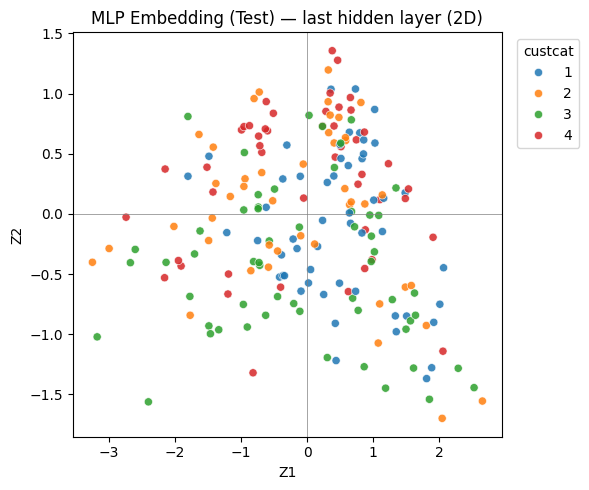

In [ ]:
# ==== MLP as a 2D reducer: extract last hidden layer (2 units) and plot ====
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# 0) آماده‌سازی داده
Xtr = X_train.values.astype("float32")
Xte = X_test.values.astype("float32")

le = LabelEncoder()
ytr_int = le.fit_transform(y_train.values)
yte_int = le.transform(y_test.values)
n_classes = len(le.classes_)
ytr_oh = keras.utils.to_categorical(ytr_int, num_classes=n_classes)
yte_oh = keras.utils.to_categorical(yte_int, num_classes=n_classes)

# (اختیاری) کلاس‌ویت برای بهبود کلاس‌های کم‌نمونه
cls_w = compute_class_weight(class_weight="balanced", classes=np.arange(n_classes), y=ytr_int)
class_weight = {i: w for i, w in enumerate(cls_w)}

# 1) معماری: input -> 5 -> 2  (embedding) -> softmax(4)
tf.keras.utils.set_random_seed(42)
inp = keras.Input(shape=(Xtr.shape[1],), name="features")
h1  = layers.Dense(5, activation="relu", name="hidden_5")(inp)
emb = layers.Dense(2, activation="linear", name="embed_2")(h1)   # لایهٔ 2بعدی (بدون فعال‌سازی غیرخطی)
out = layers.Dense(n_classes, activation="softmax", name="softmax")(emb)

model = keras.Model(inputs=inp, outputs=out, name="mlp_reducer")
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 2) آموزش با EarlyStopping
cb = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
hist = model.fit(
    Xtr, ytr_oh,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[cb],
    verbose=0
)

# 3) مدل «استخراج ویژگی» تا لایهٔ 2بعدی
feat_extractor = keras.Model(inputs=model.input, outputs=model.get_layer("embed_2").output)

Z_tr = feat_extractor.predict(Xtr, verbose=0)   # (n_train, 2)
Z_te = feat_extractor.predict(Xte, verbose=0)   # (n_test , 2)

# 4) ارزیابی طبقه‌بندی صرفاً جهت اطلاع
test_loss, test_acc = model.evaluate(Xte, yte_oh, verbose=0)
print(f"Test Accuracy (MLP): {test_acc:.4f}")

# 5) اسکاترِ ۲بعدی بر اساس برچسب‌ها (Train و Test)
df_tr = pd.DataFrame(Z_tr, columns=["Z1","Z2"])
df_tr["custcat"] = y_train.values
df_te = pd.DataFrame(Z_te, columns=["Z1","Z2"])
df_te["custcat"] = y_test.values

plt.figure(figsize=(6,5))
sns.scatterplot(data=df_tr, x="Z1", y="Z2", hue="custcat", palette="tab10", s=35, alpha=0.85)
plt.title("MLP Embedding (Train) — last hidden layer (2D)")
plt.axhline(0,color="gray",lw=0.5); plt.axvline(0,color="gray",lw=0.5)
plt.legend(title="custcat", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=df_te, x="Z1", y="Z2", hue="custcat", palette="tab10", s=35, alpha=0.85)
plt.title("MLP Embedding (Test) — last hidden layer (2D)")
plt.axhline(0,color="gray",lw=0.5); plt.axvline(0,color="gray",lw=0.5)
plt.legend(title="custcat", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout(); plt.show()


In [ ]:
# === Softmax-only classifier (no hidden layer) on PCA-2D and LDA-2D ===
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_auc_score

# 0) Inputs: pc_train/pc_test (PC1,PC2)  &  df_tr_LDA/df_te_LDA (LD1,LD2)
Xp_tr = pc_train[["PC1","PC2"]].values.astype("float32")
Xp_te = pc_test[["PC1","PC2"]].values.astype("float32")

Xl_tr = df_tr_LDA[["LD1","LD2"]].values.astype("float32")
Xl_te = df_te_LDA[["LD1","LD2"]].values.astype("float32")

ytr = y_train.values
yte  = y_test.values

# 1) Labels → integers → one-hot
le = LabelEncoder()
ytr_int = le.fit_transform(ytr)
yte_int = le.transform(yte)
K = len(le.classes_)
ytr_oh = keras.utils.to_categorical(ytr_int, num_classes=K)
yte_oh = keras.utils.to_categorical(yte_int, num_classes=K)

# 2) Softmax-only model (logistic regression multi-class)
def build_softmax_model(input_dim, n_classes):
    inp = keras.Input(shape=(input_dim,), name="x")
    out = layers.Dense(n_classes, activation="softmax", name="softmax")(inp)
    model = keras.Model(inp, out)
    model.compile(optimizer=keras.optimizers.Adam(1e-3),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

def train_and_eval(Xtr, ytr_oh, Xte, yte_int, name):
    tf.keras.utils.set_random_seed(42)
    model = build_softmax_model(Xtr.shape[1], K)
    model.fit(Xtr, ytr_oh, epochs=200, batch_size=64, verbose=0, validation_split=0.2)

    y_proba = model.predict(Xte, verbose=0)
    y_pred  = y_proba.argmax(axis=1)

    acc  = accuracy_score(yte_int, y_pred)
    bacc = balanced_accuracy_score(yte_int, y_pred)
    aucm = roc_auc_score(yte_int, y_proba, multi_class="ovr", average="macro")

    print(f"\n=== Softmax-only on {name} ===")
    print(f"Test Acc: {acc:.4f} | Bal-Acc: {bacc:.4f} | Macro AUC: {aucm:.4f}")
    print(classification_report(yte_int, y_pred, digits=3, target_names=[str(c) for c in le.classes_]))
    return {"name": name, "acc": acc, "bacc": bacc, "auc_macro": aucm}

# 3) Run on PCA-2D and LDA-2D
res_pca = train_and_eval(Xp_tr, ytr_oh, Xp_te, yte_int, "PCA-2D")
res_lda = train_and_eval(Xl_tr, ytr_oh, Xl_te, yte_int, "LDA-2D")

# 4) Summary
summary = pd.DataFrame([res_pca, res_lda])[["name","acc","bacc","auc_macro"]]
print("\n=== Summary (Softmax-only) ===")
print(summary.sort_values("acc", ascending=False).reset_index(drop=True))



=== Softmax-only on PCA-2D ===
Test Acc: 0.3400 | Bal-Acc: 0.3178 | Macro AUC: 0.5926
              precision    recall  f1-score   support

           1      0.342     0.491     0.403        53
           2      0.000     0.000     0.000        44
           3      0.384     0.589     0.465        56
           4      0.237     0.191     0.212        47

    accuracy                          0.340       200
   macro avg      0.241     0.318     0.270       200
weighted avg      0.254     0.340     0.287       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Softmax-only on LDA-2D ===
Test Acc: 0.3750 | Bal-Acc: 0.3676 | Macro AUC: 0.6609
              precision    recall  f1-score   support

           1      0.369     0.453     0.407        53
           2      0.333     0.227     0.270        44
           3      0.381     0.429     0.403        56
           4      0.405     0.362     0.382        47

    accuracy                          0.375       200
   macro avg      0.372     0.368     0.366       200
weighted avg      0.373     0.375     0.370       200


=== Summary (Softmax-only) ===
     name    acc      bacc  auc_macro
0  LDA-2D  0.375  0.367594   0.660923
1  PCA-2D  0.340  0.317835   0.592619
